<a href="https://colab.research.google.com/github/sirishti746/Deep-Learning/blob/main/regression_with_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**bold text**

In [ ]:
from warnings import filterwarnings
filterwarnings("ignore")

In [ ]:
url1 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv"

In [ ]:
print(url1)

https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/PowerPlant.csv


# Step 1 - Data Injestion

In [ ]:
import pandas as pd
df = pd.read_csv(url1)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Features names
1. AT - atmospheric temperature
2. V - Vaccum pressure in pascals
3. AP - Atmospheric pressure in pascals
4. rh - Relative hunidity in percentage
5. target - pe-power output in mega watts

In [ ]:
# Step 2 - perform basic data quality checks

In [ ]:
df.shape

(9568, 5)

In [ ]:
df = df.drop_duplicates(keep = "first").reset_index(drop = True)

In [ ]:
df.shape

(9527, 5)

In [ ]:
df.isna().sum()

,0
AT,0
V,0
AP,0
RH,0
PE,0


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9527 entries, 0 to 9526
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9527 non-null   float64
 1   V       9527 non-null   float64
 2   AP      9527 non-null   float64
 3   RH      9527 non-null   float64
 4   PE      9527 non-null   float64
dtypes: float64(5)
memory usage: 372.3 KB


# Step 3 - Sepearate X and Y

In [ ]:
X = df.drop(columns="PE")
Y = df["PE"]

In [ ]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [ ]:
Y.head()

,PE
0,480.48
1,445.75
2,438.76
3,453.09
4,464.43


# Step 4 - Apply preprocessing

In [ ]:
X.dtypes


,0
AT,float64
V,float64
AP,float64
RH,float64


In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler


In [ ]:
num_pipe = make_pipeline(
    SimpleImputer(strategy="median"),
    StandardScaler()
).set_output(transform="pandas")

In [ ]:
X_pre = num_pipe.fit_transform(X)

In [ ]:
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


In [ ]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

# Apply train test split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
xtrain, xtest, ytrain, ytest = train_test_split(X_pre, Y, test_size=0.2, random_state=42)

In [ ]:
xtrain.head()

,AT,V,AP,RH
5695,-0.152905,0.324507,0.089713,1.817999
7300,-1.497611,-1.153542,0.323712,0.908830
9066,-0.885038,-0.954892,0.293410,0.988245
6424,1.398679,1.223949,-0.479290,-1.082031
6773,-0.824586,-0.942279,0.796758,1.506499


In [ ]:
ytrain.head()

,PE
5695,446.68
7300,483.54
9066,461.71
6424,437.38
6773,463.71


In [ ]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6308,-1.501641,-1.244984,0.044260,-0.467246
8021,-1.465370,-1.418408,0.399466,-1.082031
9483,0.150695,0.648495,0.731104,-0.002393
4459,-0.036032,1.128565,-0.361449,1.586599


In [ ]:
ytest.head()

,PE
1087,429.38
6308,485.29
8021,480.40
9483,452.30
4459,446.47


In [ ]:
xtrain.shape

(7621, 4)

In [ ]:
xtest.shape

(1906, 4)

# Step 6 - Build a neural network

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense

In [ ]:
model = Sequential(
    [
        Input(shape=(xtrain.shape[1], )),
        Dense(units=8, activation="relu"),
        Dense(units=4, activation="relu"),
        Dense(units=1, activation="linear")
    ]

)

In [ ]:
model

<Sequential name=sequential, built=True>

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 81 (324.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss = "mse",optimizer="adam",metrics=["mae"])

In [ ]:
#fit the model
history = model.fit(xtrain, ytrain, validation_split=0.1, epochs=60)

Epoch 1/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 4s 7ms/step - loss: 205460.8594 - mae: 452.9246 - val_loss: 201164.0156 - val_mae: 448.0286
Epoch 2/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 199043.9219 - mae: 445.5350 - val_loss: 187307.4844 - val_mae: 431.5717
Epoch 3/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 182751.2188 - mae: 425.7752 - val_loss: 161194.8281 - val_mae: 397.4012
Epoch 4/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 154945.7969 - mae: 387.9695 - val_loss: 127693.1094 - val_mae: 344.6699
Epoch 5/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 123406.1250 - mae: 335.7769 - val_loss: 97349.8750 - val_mae: 284.4906
Epoch 6/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 94588.7500 - mae: 279.3745 - val_loss: 75487.5469 - val_mae: 244.2548
Epoch 7/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 72871.7969 - mae: 239.8916 - val_loss: 57859.4609 - val_mae: 215.2359
Epoch 8/60
215/215 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 53869.9414 - mae: 206

In [ ]:
history.history["loss"]

[204613.890625,
 196157.625,
 176694.3125,
 146901.765625,
 114534.515625,
 88145.4296875,
 68102.578125,
 50019.7734375,
 33130.1953125,
 19468.373046875,
 10736.77734375,
 6306.7255859375,
 4362.87060546875,
 3454.08349609375,
 2885.196044921875,
 2463.00439453125,
 2122.65185546875,
 1844.465576171875,
 1614.5966796875,
 1425.319091796875,
 1264.2554931640625,
 1121.997314453125,
 952.7662353515625,
 740.9758911132812,
 562.89697265625,
 431.3858947753906,
 339.33697509765625,
 273.5837097167969,
 225.95098876953125,
 189.25662231445312,
 160.61805725097656,
 138.03919982910156,
 118.74891662597656,
 102.43510437011719,
 88.12812805175781,
 76.11347961425781,
 65.89002990722656,
 57.21523666381836,
 49.88098907470703,
 44.13494873046875,
 39.25154495239258,
 35.25799560546875,
 32.18258285522461,
 29.644041061401367,
 27.62613868713379,
 25.988018035888672,
 24.588912963867188,
 23.464794158935547,
 22.75435447692871,
 22.072656631469727,
 21.5802059173584,
 21.089513778686523,
 20.

In [ ]:
history.history["val_loss"]

[201164.015625,
 187307.484375,
 161194.828125,
 127693.109375,
 97349.875,
 75487.546875,
 57859.4609375,
 40873.50390625,
 25722.890625,
 14663.6884765625,
 8450.8671875,
 5539.587890625,
 4202.93798828125,
 3453.939697265625,
 2926.736572265625,
 2518.227294921875,
 2181.2861328125,
 1905.1368408203125,
 1675.451171875,
 1486.1656494140625,
 1320.0352783203125,
 1169.49658203125,
 951.233154296875,
 723.5299682617188,
 549.8179321289062,
 425.8119812011719,
 340.0997619628906,
 276.9680480957031,
 227.03945922851562,
 189.23208618164062,
 159.20086669921875,
 134.3588409423828,
 113.08983612060547,
 96.63673400878906,
 82.95769500732422,
 71.6796646118164,
 61.304744720458984,
 52.78133010864258,
 46.045562744140625,
 39.389617919921875,
 34.74371337890625,
 31.29671287536621,
 28.238224029541016,
 25.769367218017578,
 24.365446090698242,
 22.834836959838867,
 22.292924880981445,
 21.576248168945312,
 19.520206451416016,
 19.09237289428711,
 19.43933868408203,
 18.852243423461914,
 

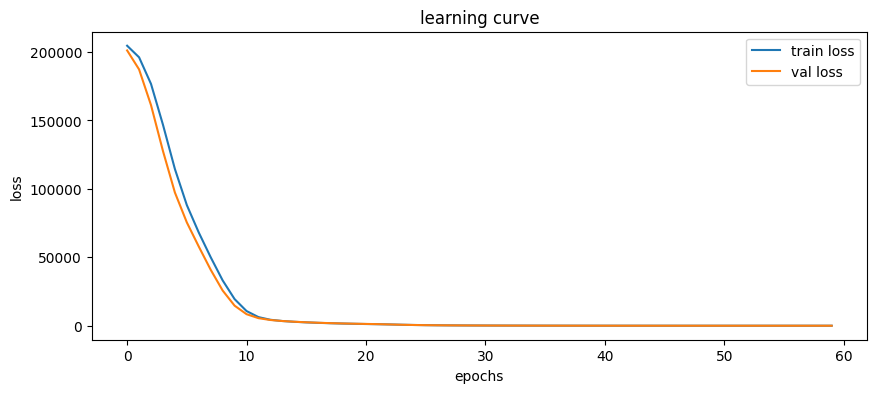

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,4))
plt.plot(history.history["loss"], label="train loss")
plt.plot(history.history["val_loss"], label="val loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("learning curve")
plt.legend()
plt.show()

# get the model weights

In [ ]:
weights = model.get_weights()
weights

[array([[ 0.44108292,  0.11537947, -1.1565562 , -0.5354733 ,  0.22432318,
         -0.44600195, -1.822186  ,  0.02223968],
        [-0.28308725, -0.01029594, -1.988342  ,  0.28267872, -0.02585879,
          0.35230753, -2.3492322 , -0.436178  ],
        [-0.19210362,  0.07986226,  1.8345652 ,  0.40314978,  0.44890684,
         -0.47805303,  2.0970738 , -0.02131249],
        [ 1.0670661 ,  0.03602655, -0.06147981, -1.6216246 , -0.52807987,
          1.2490234 , -0.13915275, -0.62995464]], dtype=float32),
 array([ 3.624495  , -0.17564984,  2.9788048 ,  3.8357928 ,  3.6220489 ,
         4.0087543 ,  3.9220161 ,  3.7308304 ], dtype=float32),
 array([[ 0.02590013,  2.5932672 , -0.32765886,  3.0521512 ],
        [ 0.4061926 , -0.24488288,  0.475107  , -0.29362893],
        [ 0.06291661, -3.0038414 , -0.48029736, -3.02403   ],
        [ 0.2886559 ,  2.7790768 , -0.06629601,  2.0928638 ],
        [-0.66241026,  2.621734  , -0.44433084,  3.3319268 ],
        [ 0.10699261,  3.6183884 , -0.515091

# Step 7 - Model evaluation

In [ ]:
train_mse,train_mae = model.evaluate(xtrain, ytrain)
print(f"train_mse: {train_mse:.2f}")
print(f", train_mae: {train_mae: .2f}")

239/239 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 18.8235 - mae: 3.3961
train_mse: 19.19
, train_mae:  3.40


In [ ]:
test_mse,test_mae = model.evaluate(xtest, ytest)
print(f"test_mse: {test_mse:.2f}")
print(f", test_mae: {test_mae: .2f}")

60/60 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 18.2120 - mae: 3.3829
test_mse: 19.20
, test_mae:  3.45


In [ ]:
from sklearn.metrics import (
    root_mean_squared_error,
    mean_absolute_error,
    r2_score,
    mean_absolute_percentage_error
)


In [ ]:
def evaluate_model(model,x,y):
  ypred = model.predict(x)
  rmse = root_mean_squared_error(y,ypred)
  mae = mean_absolute_error(y,ypred)
  mape = mean_absolute_percentage_error(y,ypred)
  r2 = r2_score(y,ypred)

  #printing
  print(f"rmse: {rmse:.2f}")
  print(f"mae: {mae:.2f}")
  print(f"mape: {mape:.2%}")
  print(f"r2: {r2:.2%}")

In [ ]:
evaluate_model(model,xtrain,ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step
rmse: 4.38
mae: 3.40
mape: 0.75%
r2: 93.32%


In [ ]:
evaluate_model(model,xtest,ytest)

60/60 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
rmse: 4.38
mae: 3.45
mape: 0.76%
r2: 93.64%


# from above results the model is good because r2 score is greater then 0.8

# Step 8 - Out of sample prediction

In [ ]:
url2 = "https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/refs/heads/main/test_PowerPlant.csv"

In [ ]:
xnew = pd.read_csv(url2)

In [ ]:
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [ ]:
num_pipe

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler())])

In [ ]:
xnew_pre = num_pipe.transform(xnew)

In [ ]:
xnew_pre

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908
...,...,...,...,...
95,0.898948,1.197147,-0.805877,-0.196139
96,-1.058331,-1.129893,-0.314313,0.658261
97,-1.885843,-1.017956,1.291690,0.881445
98,0.712221,1.631496,-0.839546,0.491899


In [ ]:
preds = model.predict(xnew_pre)

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step


In [ ]:
preds[0:5]

array([[445.27863],
       [438.3636 ],
       [432.53912],
       [439.49887],
       [472.8819 ]], dtype=float32)

In [ ]:
xnew["PE_preds"] = preds.round(2)

In [ ]:
xnew.head()

,AT,V,AP,RH,PE_preds
0,22.49,58.82,1009.73,85.19,445.279999
1,28.88,54.89,1007.16,46.60,438.359985
2,27.89,73.21,1001.32,85.88,432.540009
3,25.69,62.26,1011.38,74.08,439.500000
4,12.16,40.81,1025.79,70.97,472.880005


from matplotlib import pyplot as plt
_df_0['AT'].plot(kind='hist', bins=20, title='AT')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_1['V'].plot(kind='hist', bins=20, title='V')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_2['AP'].plot(kind='hist', bins=20, title='AP')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_3['RH'].plot(kind='hist', bins=20, title='RH')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_4.plot(kind='scatter', x='AT', y='V', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_5.plot(kind='scatter', x='V', y='AP', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_6.plot(kind='scatter', x='AP', y='RH', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_7.plot(kind='scatter', x='RH', y='PE_preds', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
_df_8['AT'].plot(kind='line', figsize=(8, 4), title='AT')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_9['V'].plot(kind='line', figsize=(8, 4), title='V')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_10['AP'].plot(kind='line', figsize=(8, 4), title='AP')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
_df_11['RH'].plot(kind='line', figsize=(8, 4), title='RH')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
xnew.to_csv("results.csv",index=False)

# Step 9 -  saving and loading the model

In [ ]:
model.save("plantmodel.keras")

In [ ]:
import joblib
joblib.dump(num_pipe,"num_pipe.joblib")

['num_pipe.joblib']

# Loading preprocessor and model

In [ ]:
p = joblib.load("num_pipe.joblib")

In [ ]:
from tensorflow.keras.models import load_model
m = load_model("plantmodel.keras")

In [ ]:
m.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 8)              │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │            36 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 245 (984.00 B)

 Trainable params: 81 (324.00 B)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 164 (660.00 B)

In [ ]:
m.evaluate(xtrain,ytrain)

239/239 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 18.8235 - mae: 3.3961


[19.191844940185547, 3.3999223709106445]